In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
accuracy=[]
model=[]

In [2]:
at_data=pd.read_csv('../data/Stress-Lysis.csv')

In [3]:
at_data.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [4]:
at_data.shape

(2001, 4)

In [5]:
at_data.nunique()

Humidity        2001
Temperature     2001
Step count       201
Stress Level       3
dtype: int64

In [6]:
at_data.isna().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [7]:
at_data.dtypes

Humidity        float64
Temperature     float64
Step count        int64
Stress Level      int64
dtype: object

In [8]:
at_data.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


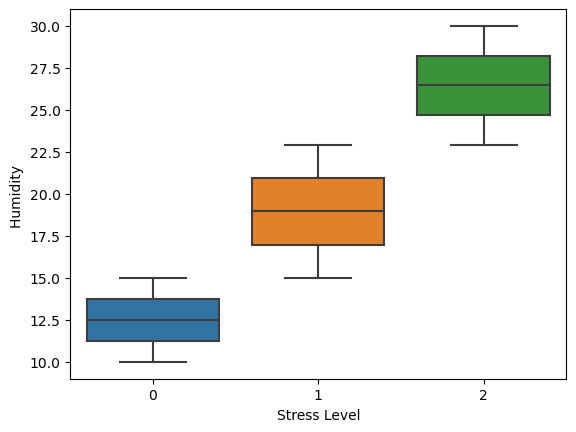

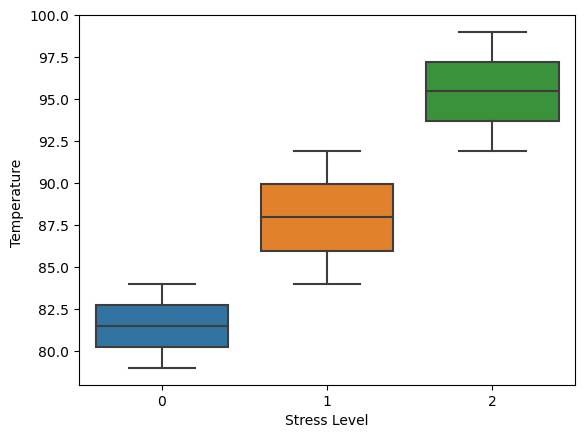

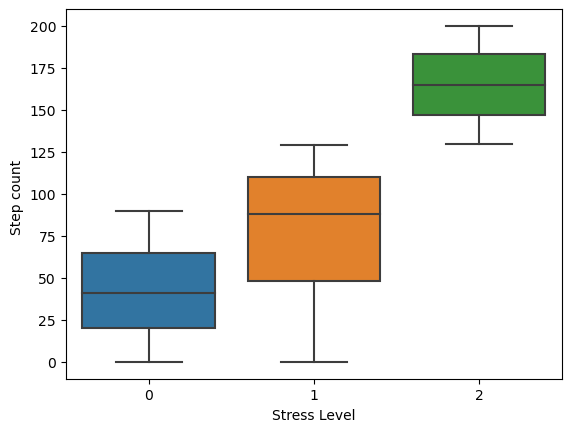

In [9]:
for i in at_data.columns:
    if i != "Stress Level":
           sns.boxplot(data=at_data,y=i,x="Stress Level")
           plt.show()

In [10]:
data_train,data_test=train_test_split(at_data,test_size=0.3,random_state=134)

In [11]:
data_train.shape

(1400, 4)

In [12]:
data_test.shape

(601, 4)

In [13]:
X_train=data_train.drop(['Stress Level'],axis=1)
y_train=data_train['Stress Level']
X_test=data_test.drop(['Stress Level'],axis=1)
y_test=data_test['Stress Level']

In [14]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_dt_p=dt.predict(X_test)
print(accuracy_score(y_test,y_dt_p)*100)
print(confusion_matrix(y_test,y_dt_p))
print(classification_report(y_test,y_dt_p))

99.83361064891847
[[159   0   0]
 [  0 229   1]
 [  0   0 212]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       230
           2       1.00      1.00      1.00       212

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



In [15]:
svc=SVC(kernel="poly",random_state=13)
svc.fit(X_train,y_train)
y_svc_p=svc.predict(X_test)
print(accuracy_score(y_test,y_svc_p)*100)
print(confusion_matrix(y_test,y_svc_p))
print(classification_report(y_test,y_svc_p))

99.33444259567388
[[155   4   0]
 [  0 230   0]
 [  0   0 212]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       159
           1       0.98      1.00      0.99       230
           2       1.00      1.00      1.00       212

    accuracy                           0.99       601
   macro avg       0.99      0.99      0.99       601
weighted avg       0.99      0.99      0.99       601



In [16]:
# Convert DataFrames to NumPy arrays
X_train_np = X_train.values
X_test_np = X_test.values

# Convert labels to NumPy array if not already
y_train_np = y_train.values
y_test_np = y_test.values

# Initialize and fit the model
knn = KNeighborsClassifier(n_neighbors=3,weights="uniform",algorithm="ball_tree")
knn.fit(X_train_np, y_train_np)

# Predict and evaluate
y_knn_p = knn.predict(X_test_np)
print(accuracy_score(y_test_np, y_knn_p) * 100)
print(confusion_matrix(y_test_np, y_knn_p))
print(classification_report(y_test,y_knn_p))

99.00166389351082
[[155   4   0]
 [  2 228   0]
 [  0   0 212]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.98      0.99      0.99       230
           2       1.00      1.00      1.00       212

    accuracy                           0.99       601
   macro avg       0.99      0.99      0.99       601
weighted avg       0.99      0.99      0.99       601



In [17]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_mnb_p=mnb.predict(X_test)
print(accuracy_score(y_test,y_mnb_p)*100)
print(confusion_matrix(y_test,y_mnb_p))
print(classification_report(y_test,y_mnb_p))

71.54742096505824
[[108  51   0]
 [ 73 110  47]
 [  0   0 212]]
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       159
           1       0.68      0.48      0.56       230
           2       0.82      1.00      0.90       212

    accuracy                           0.72       601
   macro avg       0.70      0.72      0.70       601
weighted avg       0.71      0.72      0.70       601



In [18]:
import joblib

joblib.dump(dt, 'atmosphereModel.joblib')


['atmosphereModel.joblib']